## New york Taxi Analysis

### Objective: 
     The goal of this project is to build a machine learning model that can accurately predict the average amount of money 
     that people spend on cab rides in a certain region of New York at a given time of day. 

### Methodology: 
     To accomplish this goal, we will gather data on past cab rides in New York, including the location, time of day, and 
     fare paid. We will then use this data to train and test a machine learning model that can predict the average fare for 
     a cab ride in a given region at a given time of day.

### Expected Results:
     We expect that our machine learning model will be able to accurately predict the average fare for a cab ride in a 
     given region at a given time of day, based on the data we have collected. This will allow us to provide more 
     accurate estimates of cab fares to potential riders, and may also be useful for cab companies in pricing their services.

### Potential Applications: 
     The ability to accurately predict cab fares could be useful for a variety of stakeholders, including cab companies, 
     riders, and transportation planners. By providing more accurate fare estimates, we can help cab companies to price 
     their services more effectively and riders to better plan their transportation needs.

#### Source:

1. Got the data from the following link:  https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
		a. I will be working on Yello taxi trip records.
2. Data Dictionary for the yellow cab in NYC - https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
		a. This data dictionary describes yellow taxi trip data. For a dictionary describing green taxi data, or a map of the TLC Taxi Zones

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 2. Getting the Data or Import Data

In [2]:
taxi_data = pd.read_csv('data/yellow_tripdata_2019-01.csv')

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
print(taxi_data.shape)

(7667792, 18)


## 3. Data Exploration

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count','trip_distance','RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [7]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [8]:
taxi_data['PULocationID'].unique()

array([151, 239, 236, 193, 163, 229, 141, 246, 238, 224, 170, 107,  41,
       116, 113, 161, 138, 144, 231, 237, 263, 132, 264, 142, 249, 137,
        90, 162, 140,  68,  88,  74,  79,  75, 233, 148,  48, 143,   4,
       164, 232,  45,  43, 186, 158,  50, 114,  42,  14,  11, 181, 211,
        13, 261,  97, 234, 125, 145, 262, 226,  24, 166,  80, 189,  33,
       100, 126, 159, 244, 243, 209,  87,  25, 260, 223, 196, 152, 230,
         7,  66, 228, 235, 265, 134,  65, 129,  82, 195, 255, 179, 169,
        89,  37,  17, 225,  12,  52, 112, 256,  61, 257, 215,  70, 217,
       177,  49, 168,  76, 133, 198,  40, 247, 254, 216,  77, 250, 119,
       106, 208,  60, 146, 191,  54, 205,  36, 153,  34,  78, 130, 241,
        69, 124, 190, 203,  19, 213,  10, 218, 174, 248, 222, 157, 160,
       188,  93, 123,  39,  63,  21,  94, 127,  51,  20,  18, 122,  35,
        56, 259, 202,  71,  92, 197, 136,  62,  83,   8, 120, 220,  95,
       173, 165,  81, 227, 128,  67, 183,  16, 147, 201, 167, 21

array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

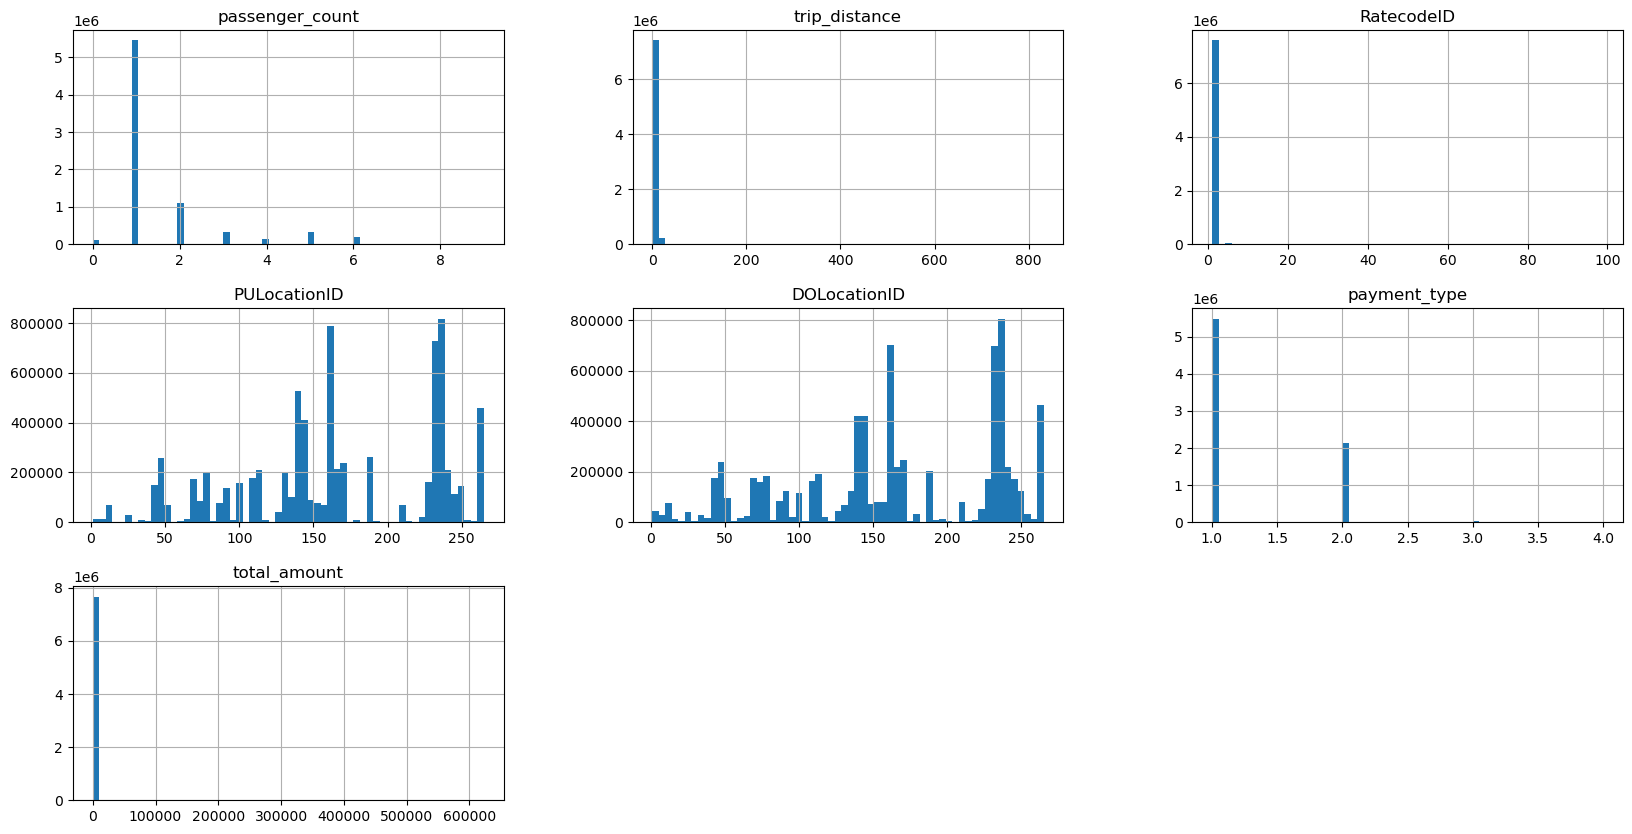

In [9]:
taxi_data.hist(figsize=(20,10), bins=60) 

In [10]:
taxi_data['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

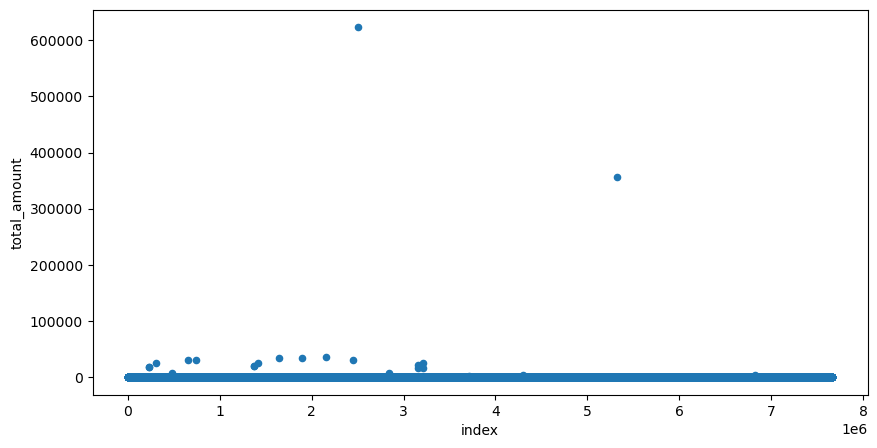

In [11]:
taxi_data.reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

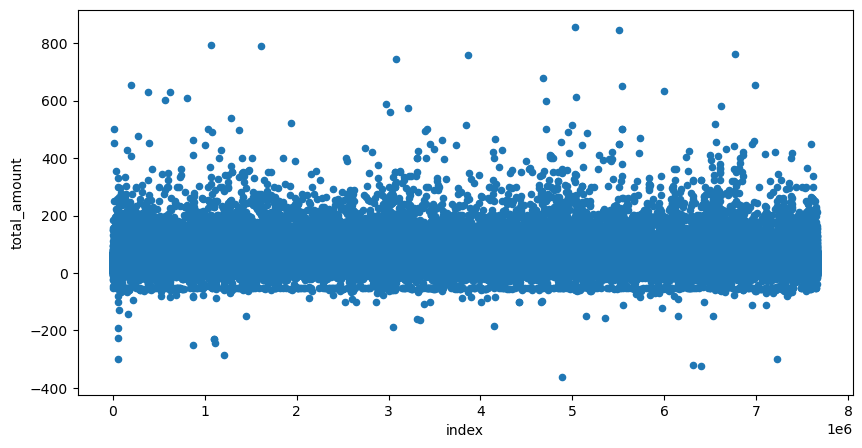

In [12]:
taxi_data[taxi_data['total_amount'] < 1000].reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))

#### Data Problem 1: Taking care of the negative values in 'total_amount' feature
#####      -Domain knowledge is important to solve data problems, we can ask the domain expert before we do anything with the dataset

In [13]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(7131, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

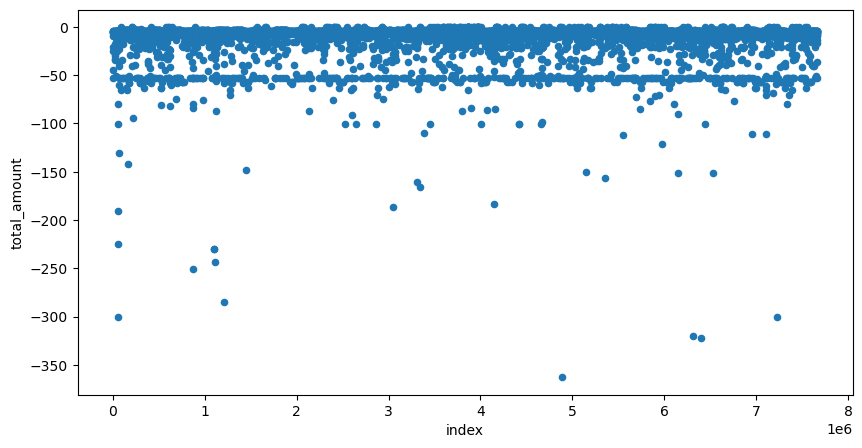

In [14]:
taxi_data[taxi_data['total_amount'] < 0].reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))

In [15]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [16]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

<AxesSubplot:>

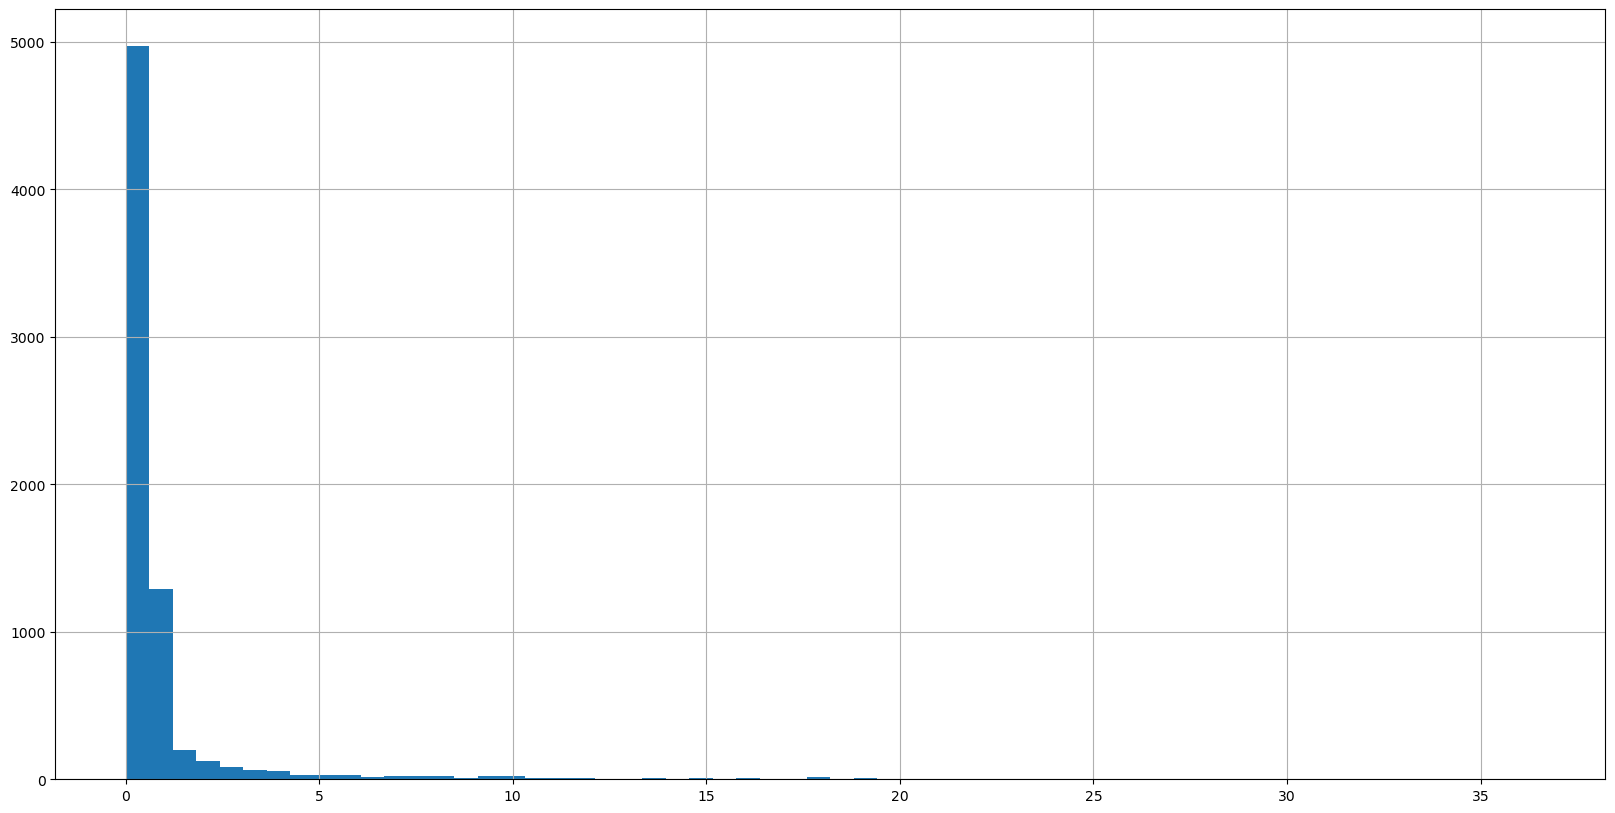

In [17]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(20,10), bins=60)

In [18]:
print(taxi_data[taxi_data['total_amount']==0].shape)

(1414, 9)


In [19]:
taxi_data[taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [20]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

<AxesSubplot:>

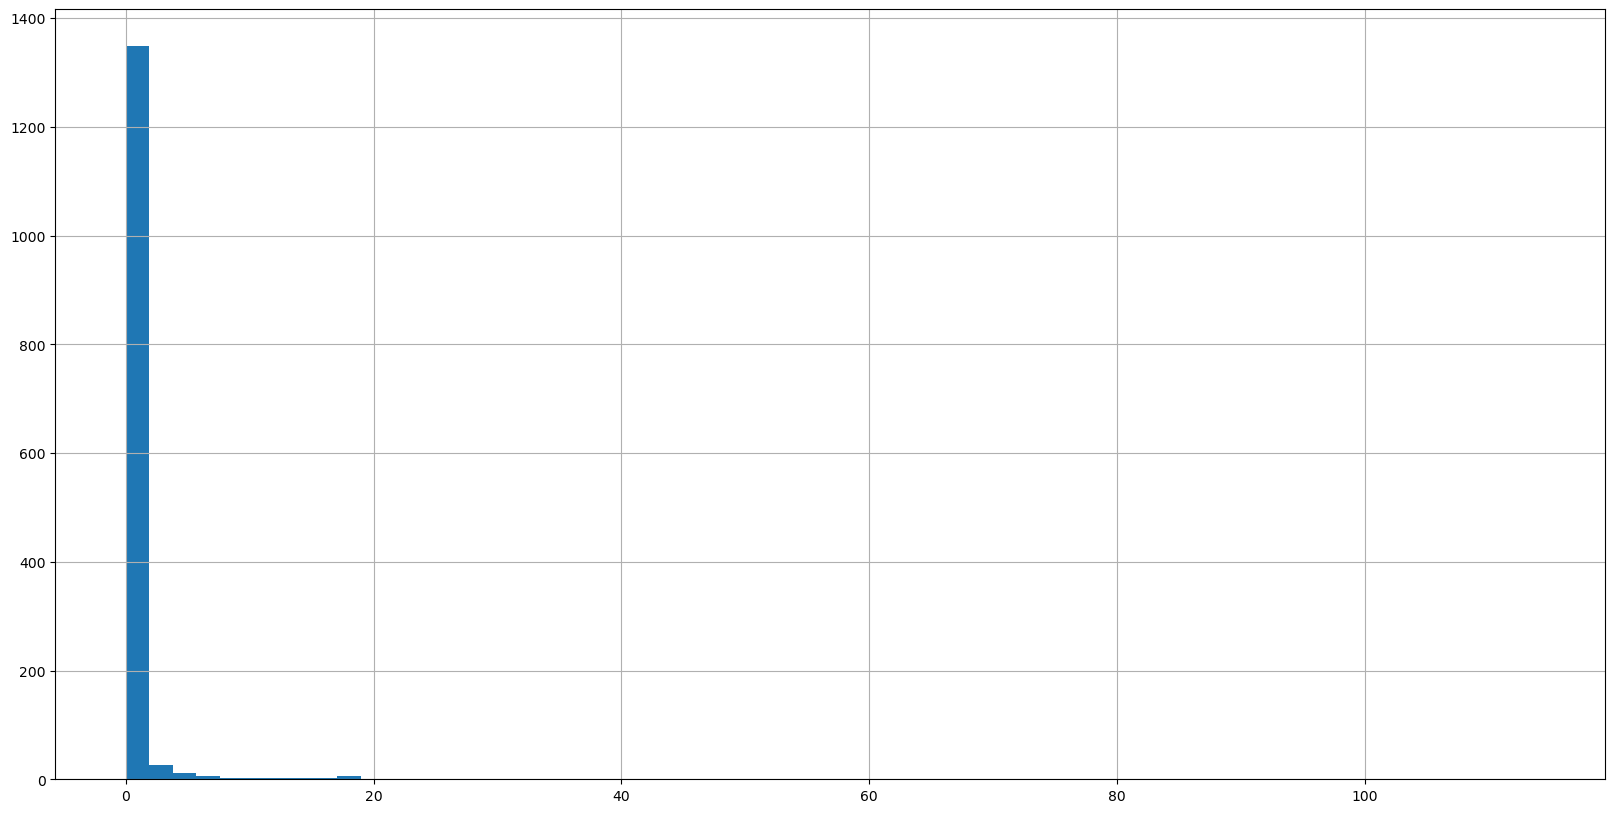

In [21]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(figsize=(20,10), bins=60)

In [22]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: trip_distance, Length: 110, dtype: int64

#### Data Problem 2: High Values
##### -we will be seeing the outliers in our dataset.

<AxesSubplot:xlabel='index', ylabel='total_amount'>

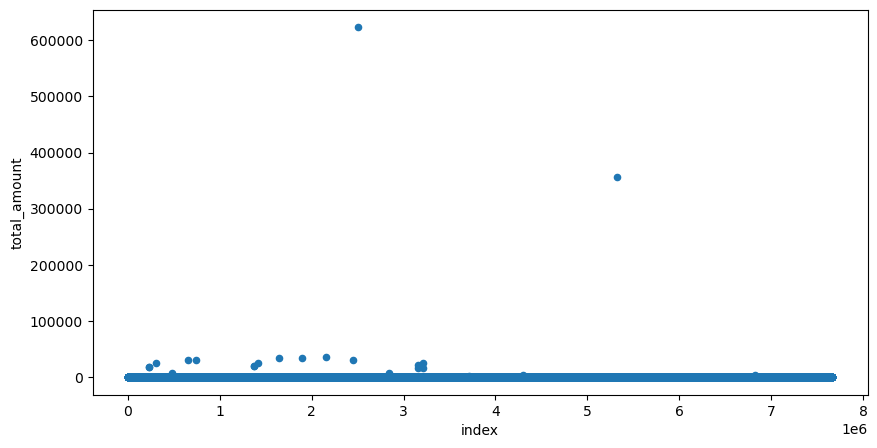

In [23]:
taxi_data.reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))

In [24]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [25]:
taxi_data['total_amount'].mean()

15.68222215901336

## 4. Data Cleaning 
### - we saw the data problems in the previous section and now we will try to clean them.

In [26]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']<200)]

In [27]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

In [28]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 5. Data Preparation
### - Preparing our dataset for the machine learning model. 

In [29]:
taxi_data_prepared = taxi_data_filtered.copy()

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [31]:
taxi_data_prepared.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7.659490e+06,7.659490e+06,7.659490e+06,7.659490e+06,7.659490e+06,7.659490e+06,7.659490e+06
mean,1.567063e+00,2.798936e+00,1.057376e+00,1.655045e+02,1.637499e+02,1.289895e+00,1.548610e+01
std,1.224437e+00,3.709140e+00,6.584683e-01,6.638644e+01,7.035946e+01,4.691423e-01,1.338108e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,9.000000e-01,1.000000e+00,1.310000e+02,1.130000e+02,1.000000e+00,8.300000e+00
50%,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.127000e+01
75%,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.656000e+01
max,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.999800e+02


In [32]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


#### Dealing with dtypes

In [33]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [34]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared.loc[:,'RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared.loc[:,'PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared.loc[:,'DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared.loc[:,'payment_type'].astype(str)

In [35]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

#### Information Extraction

In [36]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# we make it datetime again because it very little use when it's just a string (can't compare, sort, etc)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [37]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

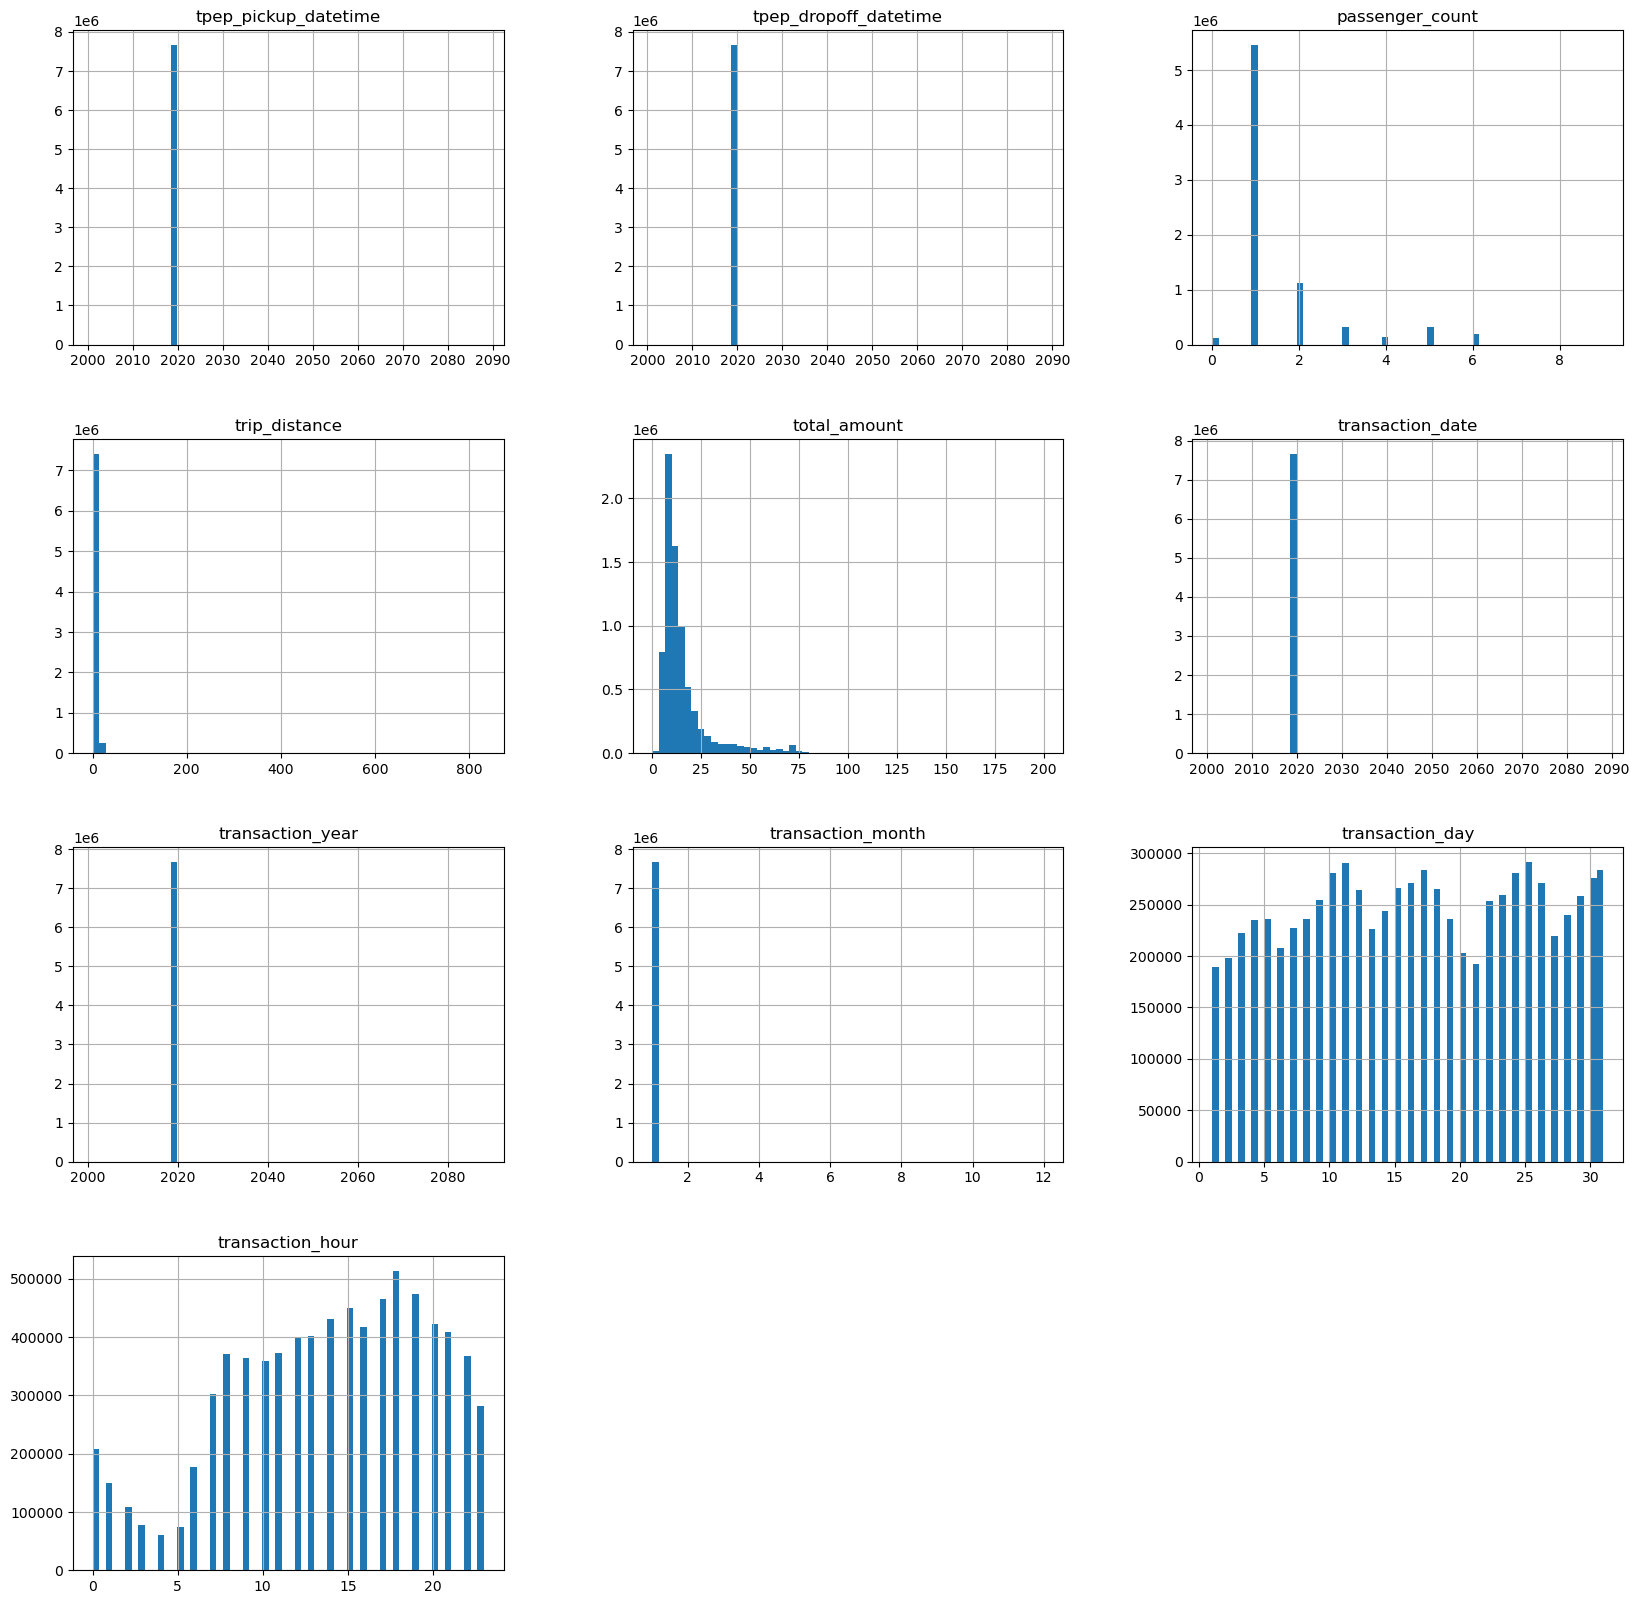

In [38]:
taxi_data_prepared.hist(figsize=(20,20), bins=60)

In [39]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month'] == 1]

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

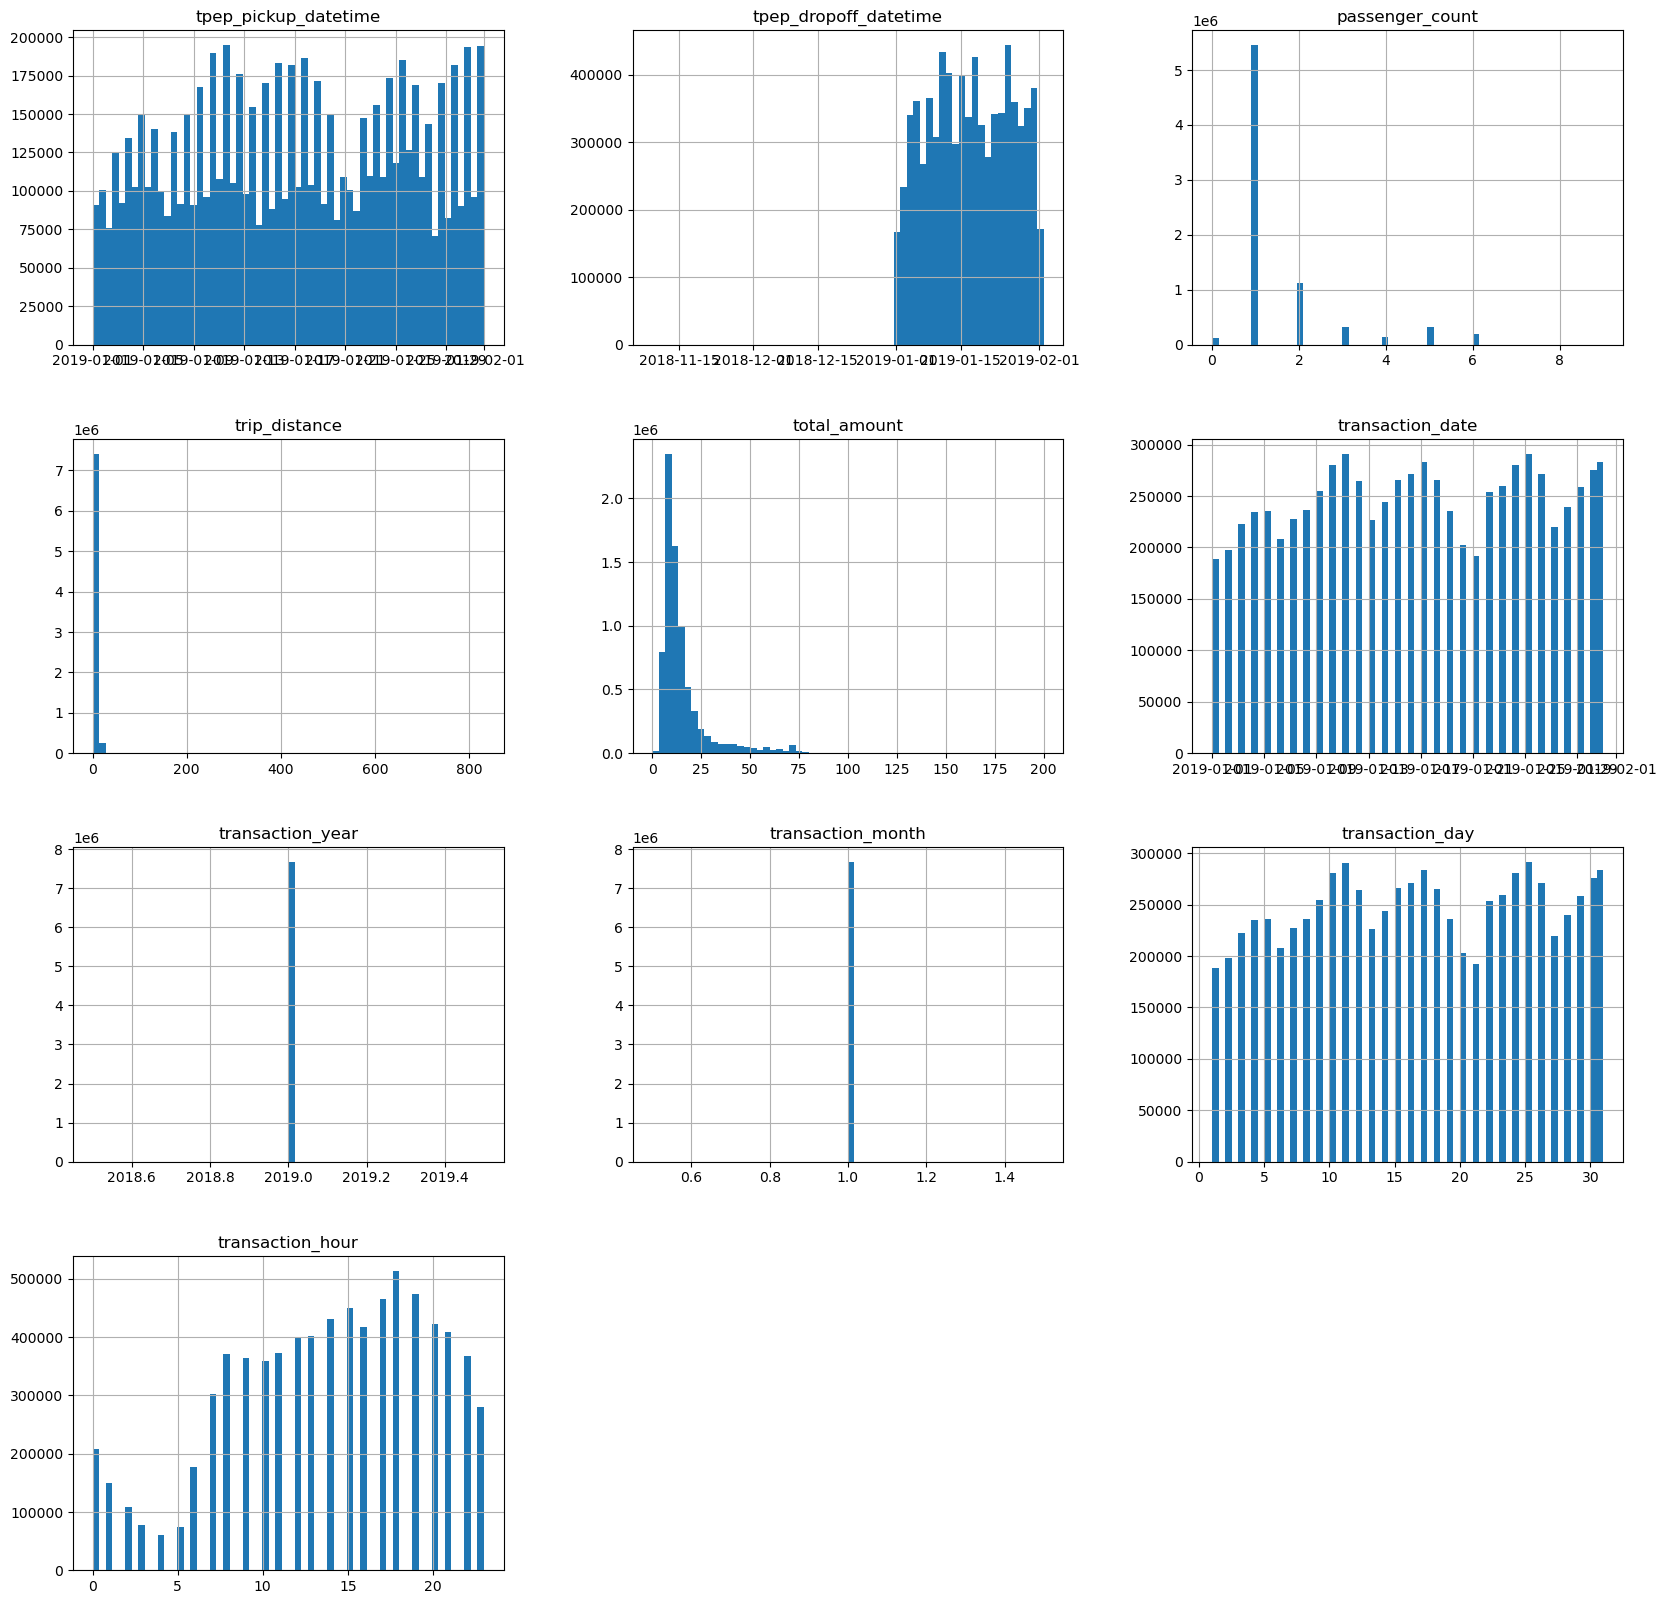

In [40]:
taxi_data_prepared.hist(figsize=(20,20), bins=60)

## What do we want to acheive in this notebook?
### - Problem statement --> Predict how much money or the average money that people spend for a cab ride in new york in certain region in given hour of a day of a month.

### we have to agregate the data that brings us for every region of every hour of every different day and the average or mean of all the transaction that happened in that certain day, in that certain hour and in that certain region.

##### Noting down our categorical values and numerical values

In [41]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [42]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


#### Aggregating data points in our dataframe - by combining PULocationID and transaction_date and get the average amount

In [43]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transaction'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head(20)

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1,2019-01-01,1,1,2,0.0000,21.8000,1
1,1,2019-01-01,1,1,5,0.0000,87.3000,1
2,1,2019-01-01,1,1,6,0.0000,80.3000,1
3,1,2019-01-01,1,1,8,0.0000,128.5800,2
4,1,2019-01-01,1,1,10,16.9000,43.2450,4
5,1,2019-01-01,1,1,12,4.8250,126.2525,4
6,1,2019-01-01,1,1,13,0.0000,85.3000,1
7,1,2019-01-01,1,1,15,20.6400,79.3100,2
8,1,2019-01-01,1,1,17,0.0000,105.5000,1
9,1,2019-01-01,1,1,19,0.0550,115.3300,2


<AxesSubplot:>

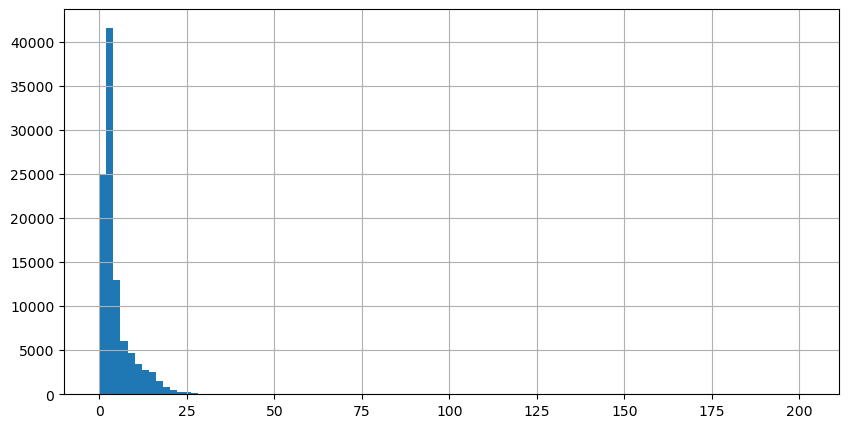

In [44]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<AxesSubplot:>

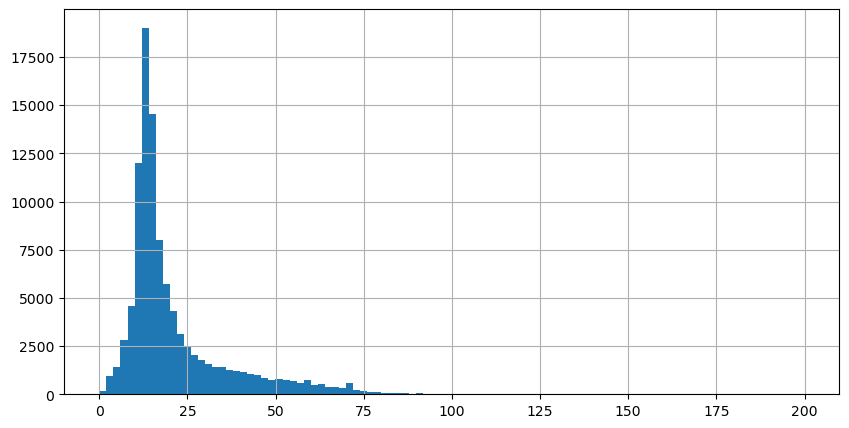

In [45]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

## 6. Benchmark Model 
### - Benchmarking is crucial to understanding our problem and how effective our solution is. A benchmark model is a model that has the bare minimum information that is trained with as little effort as possible. It is the baseline we will compare our hard-worked-on models to see if all the work we will to to generate new feature and tune the models will be in vain or not.
### - We are running this model without any feature engineering to get a benchmark ofc

In [46]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

### Train-Test Split

In [47]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.778205564362597
mean_squared_error 217.23937445335156
root_mean_squared_error 14.739042521593849
r2 0.224768443067358


## Feature Engineering 
### - So far we've only worked with the information that came built in from the data we downloaded. But we don't need to get stuck using the same old features, there is much more we can do. We're about to start feature engineering. It is where we should think about some other features we can come up with that just might improve our predictions.

In [48]:
data_with_new_features = taxi_grouped_by_region.copy()

#### Borough Information

In [49]:
zone_lookup = pd.read_csv('data/taxi+_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)

In [50]:
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [51]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,EWR


In [52]:
# Encode the ordinal categorical variable 'cut'
borough_mapping = {'EWR': 0, 'Queens': 1, 'Bronx': 2, 'Manhattan': 3, 'Staten Island': 4, 'Brooklyn': 5}
data_with_new_features.Borough = data_with_new_features.Borough.map(borough_mapping)

In [53]:
data_with_new_features['Borough'].value_counts()

3.0    45309
5.0    23633
1.0    22002
2.0     9586
4.0      302
0.0      271
Name: Borough, dtype: int64

In [54]:
data_with_new_features['Borough'].isna().sum()

1453

In [55]:
data_with_new_features['Borough'].unique()

array([ 0.,  1.,  3.,  5.,  4.,  2., nan])

In [56]:
data_with_new_features.dropna(inplace=True)

In [57]:
data_with_new_features['Borough'].unique()

array([0., 1., 3., 5., 4., 2.])

In [58]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,0.0
1,1,2019-01-01,1,1,5,0.0,87.300,1,0.0
2,1,2019-01-01,1,1,6,0.0,80.300,1,0.0
3,1,2019-01-01,1,1,8,0.0,128.580,2,0.0
4,1,2019-01-01,1,1,10,16.9,43.245,4,0.0


## Model Training

In [59]:
data_for_model = data_with_new_features.copy()

In [60]:
data_for_model['Borough'].value_counts()

3.0    45309
5.0    23633
1.0    22002
2.0     9586
4.0      302
0.0      271
Name: Borough, dtype: int64

In [61]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101103 entries, 0 to 102555
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   PULocationID          101103 non-null  object        
 1   transaction_date      101103 non-null  datetime64[ns]
 2   transaction_month     101103 non-null  int64         
 3   transaction_day       101103 non-null  int64         
 4   transaction_hour      101103 non-null  int64         
 5   trip_distance         101103 non-null  float64       
 6   total_amount          101103 non-null  float64       
 7   count_of_transaction  101103 non-null  int64         
 8   Borough               101103 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 7.7+ MB


In [62]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'Borough']
input_features = categorical_features #DIDNT INCLUDE TRIP DISTANCE 
target_features = 'total_amount'

In [63]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_features]

#one-hot encoding
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Decision Tree Algorithm

In [64]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [65]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.267182947600382
mean_squared_error 184.2328526598119
root_mean_squared_error 13.57324031540781
r2 0.2978427369667298


<AxesSubplot:xlabel='true', ylabel='pred'>

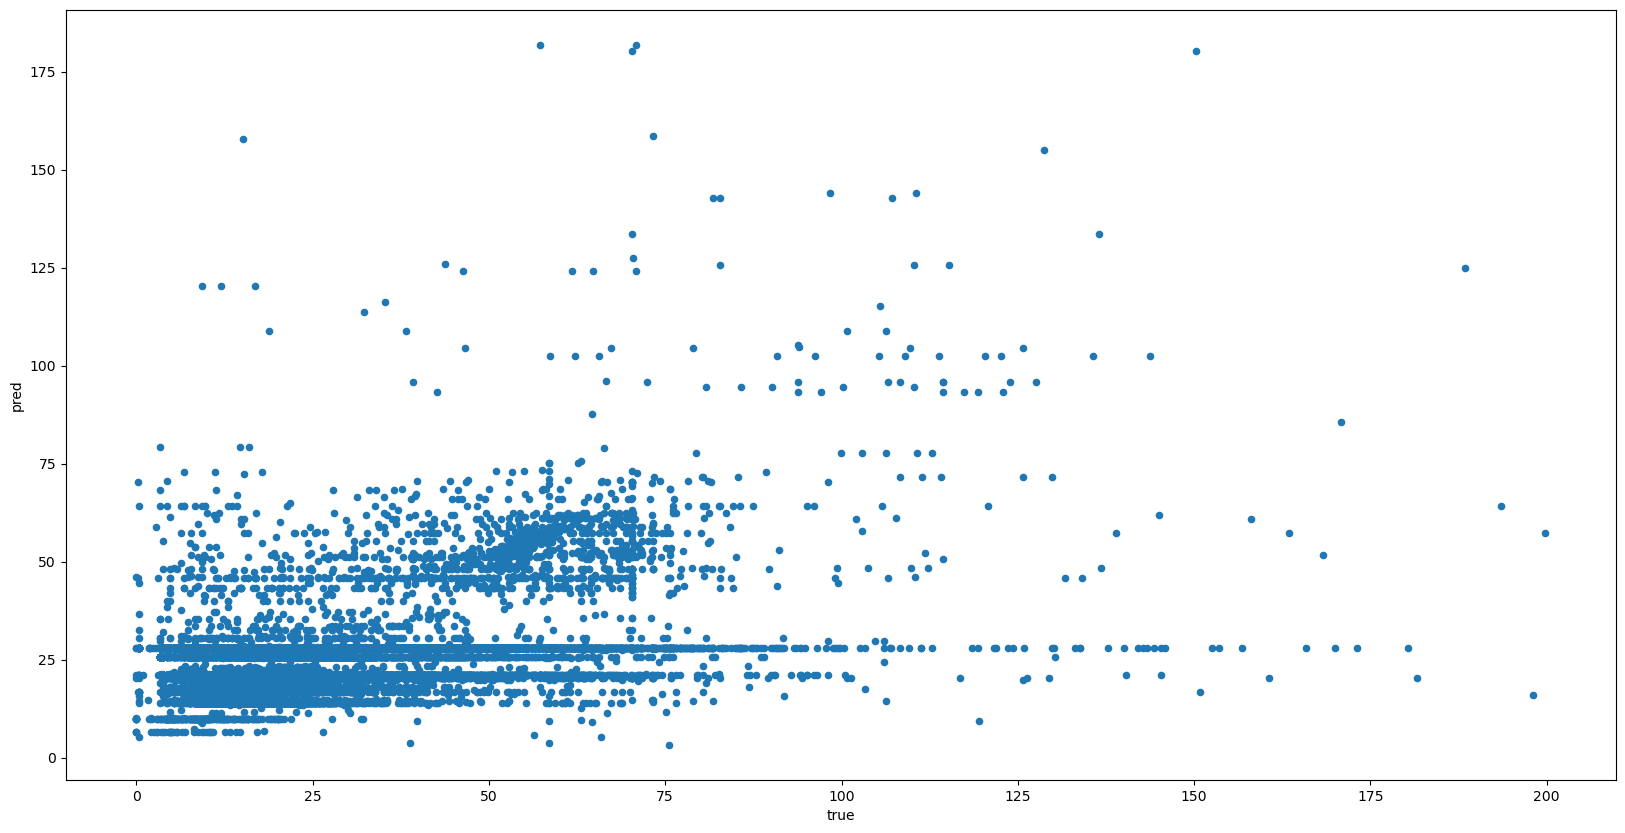

In [66]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Random Forest Algorithm

In [67]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
model_at_hand = random_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.51740189077362
mean_squared_error 178.51576774315896
root_mean_squared_error 13.360979295813573
r2 0.31963197075240124


<AxesSubplot:xlabel='true', ylabel='pred'>

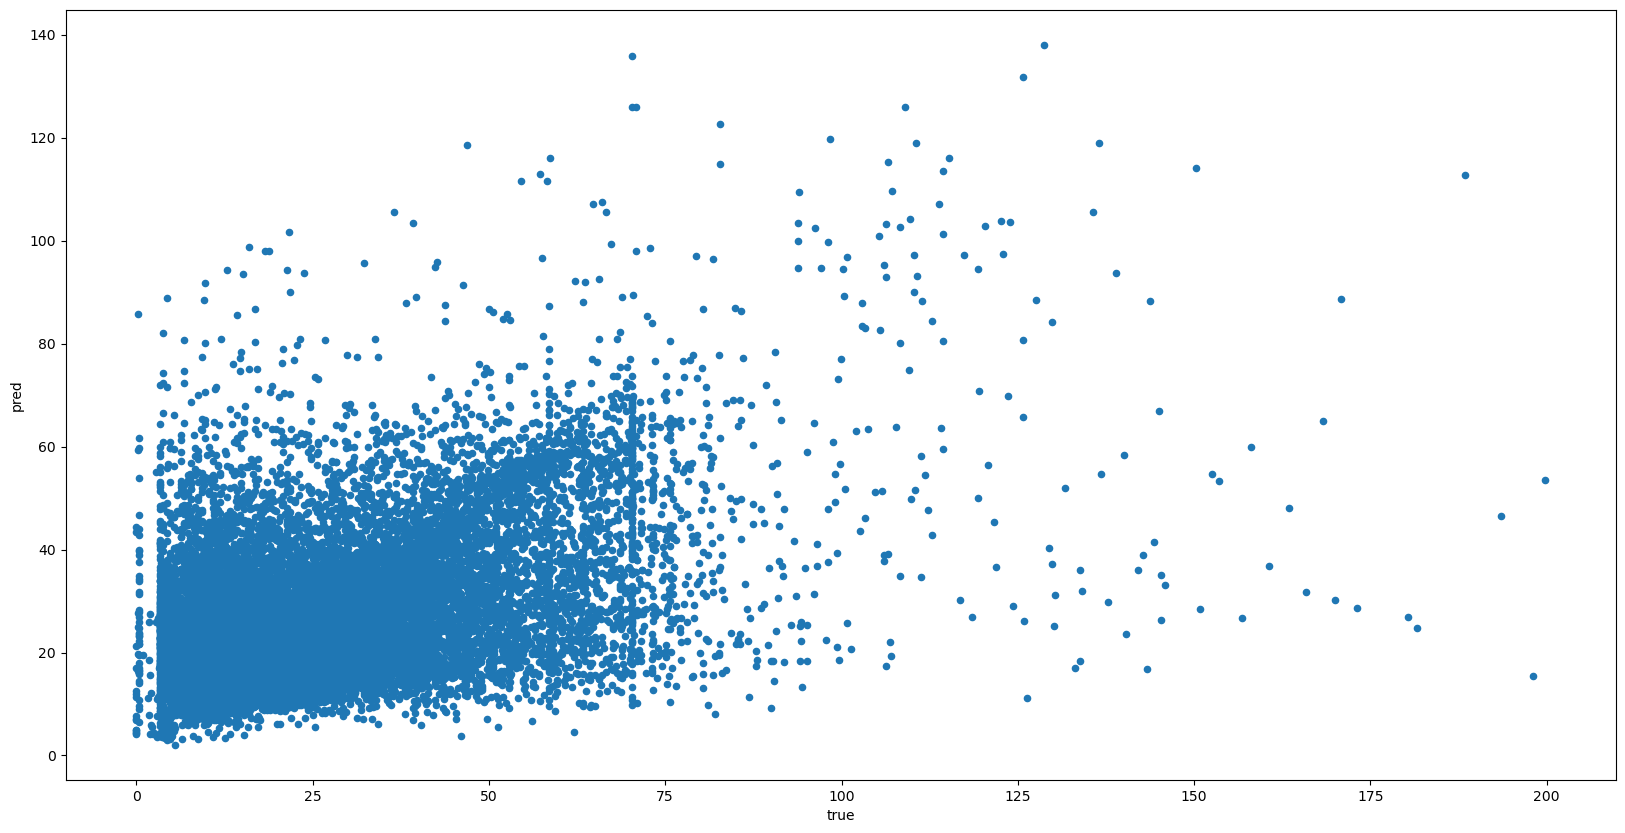

In [69]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

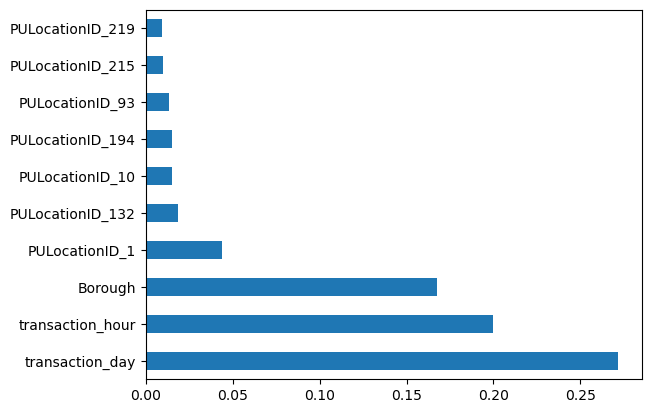

In [70]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

## Tuning of Model
### -Finding the best parameters

### Checking the fine tuned model before finalising.

In [71]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1400,min_samples_split= 10,
min_samples_leaf= 10,
max_features= 'sqrt',
max_depth= None,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  171.15553760528564  seconds
mean_absolute_error 7.185220626260364
mean_squared_error 150.87233528751366
root_mean_squared_error 12.283010025539898
r2 0.4249879731899352


<AxesSubplot:xlabel='true', ylabel='pred'>

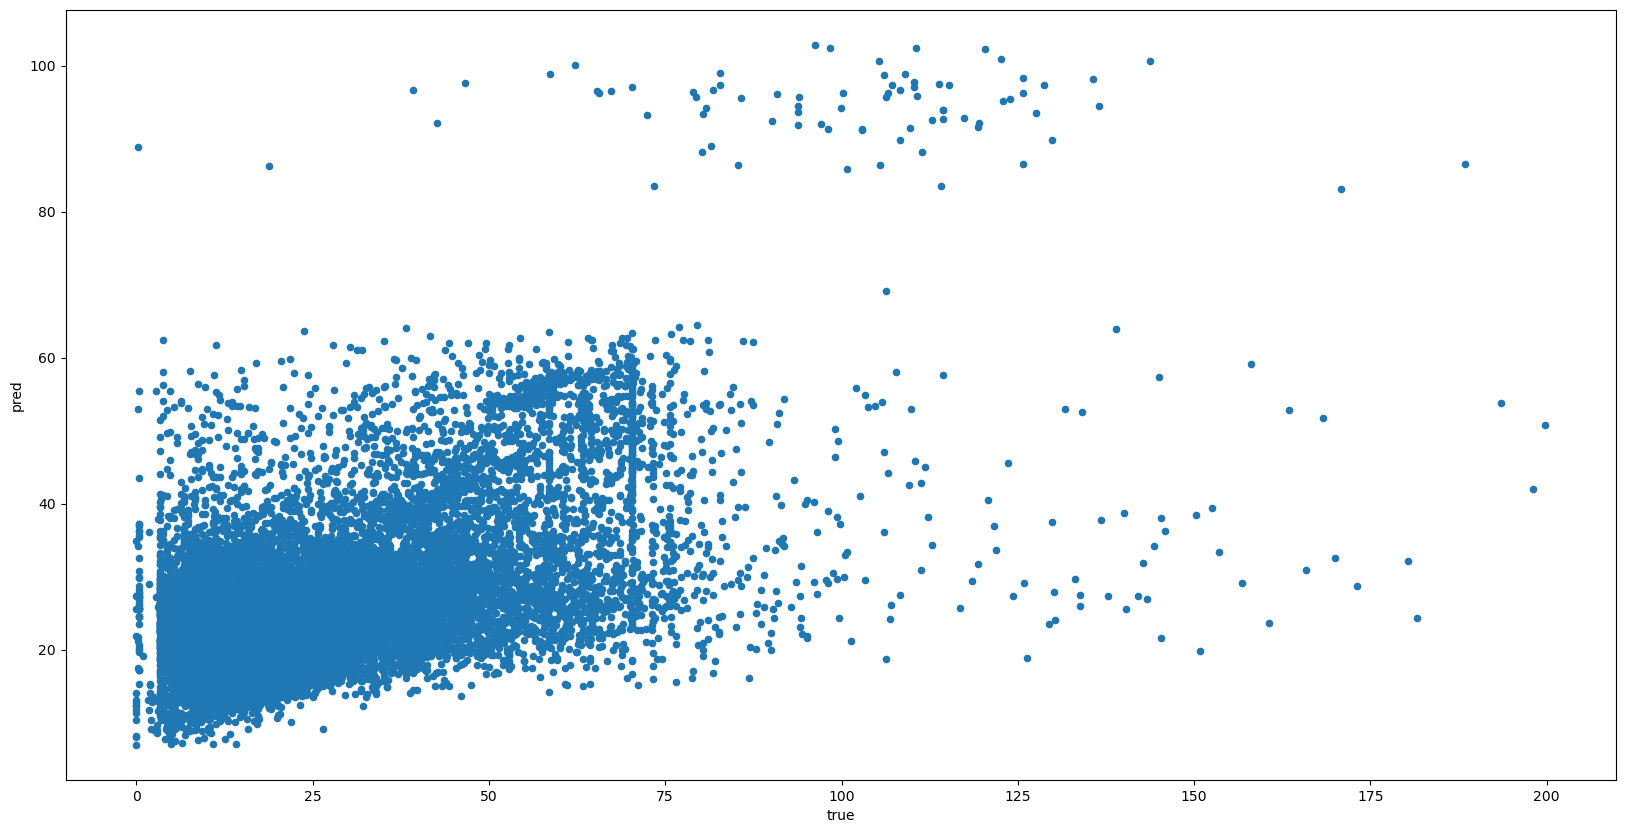

In [72]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [73]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionfinal.csv')

In [74]:
X

,transaction_month,transaction_day,transaction_hour,Borough,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_101,PULocationID_102,PULocationID_104,...,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_96,PULocationID_97,PULocationID_98,PULocationID_99
0,1,1,2,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,8,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,10,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102551,1,31,18,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102552,1,18,18,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102553,1,26,8,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102554,1,30,7,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
data_for_model.isna().sum()

PULocationID            0
transaction_date        0
transaction_month       0
transaction_day         0
transaction_hour        0
trip_distance           0
total_amount            0
count_of_transaction    0
Borough                 0
dtype: int64

In [76]:
data_for_model_revised = data_for_model.copy()

In [77]:
data_for_model_revised.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,0.0
1,1,2019-01-01,1,1,5,0.0,87.300,1,0.0
2,1,2019-01-01,1,1,6,0.0,80.300,1,0.0
3,1,2019-01-01,1,1,8,0.0,128.580,2,0.0
4,1,2019-01-01,1,1,10,16.9,43.245,4,0.0


In [78]:
data_for_model_revised['PULocationID'] = data_for_model_revised['PULocationID'].astype(int)

In [79]:
data_for_model_revised.describe()

,PULocationID,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,Borough
count,101103.000000,101103.0,101103.000000,101103.000000,101103.000000,101103.000000,101103.000000,101103.000000
mean,137.999367,1.0,15.934028,11.738346,4.731377,21.432235,74.142785,2.932396
std,75.972110,0.0,8.950465,6.554927,4.623734,16.199123,143.296675,1.386672
min,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,74.000000,1.0,8.000000,7.000000,2.034931,12.355126,1.000000,2.000000
50%,141.000000,1.0,16.000000,12.000000,2.933333,15.243077,6.000000,3.000000
75%,209.000000,1.0,24.000000,17.000000,5.497083,23.933667,71.000000,3.000000
max,263.000000,1.0,31.000000,23.000000,201.270000,199.820000,1402.000000,5.000000


In [80]:
data_for_model_revised.Borough.value_counts()

3.0    45309
5.0    23633
1.0    22002
2.0     9586
4.0      302
0.0      271
Name: Borough, dtype: int64

## Running the Random forest ML model after hyper parameter tuning 

In [81]:
categorical_features = ['transaction_month', 'transaction_day',
       'transaction_hour', 'Borough']
input_features = categorical_features + ['PULocationID'] #DIDNT INCLUDE TRIP DISTANCE 
target_features = 'total_amount'

In [82]:
from sklearn.model_selection import train_test_split

X = data_for_model_revised[input_features]
y = data_for_model_revised[target_features]

#one-hot encoding
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [83]:
X.head()

,transaction_month,transaction_day,transaction_hour,Borough,PULocationID
0,1,1,2,0.0,1
1,1,1,5,0.0,1
2,1,1,6,0.0,1
3,1,1,8,0.0,1
4,1,1,10,0.0,1


In [84]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor(n_estimators=1400,min_samples_split= 10,
min_samples_leaf= 10,
max_features= 'sqrt',
max_depth= None,
bootstrap= True)
random_model.fit(X_train, y_train)

model_at_hand_revised = random_model

y_pred = model_at_hand_revised.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.484610923475456
mean_squared_error 159.56285629482824
root_mean_squared_error 12.631819199736364
r2 0.39186623427783807


<AxesSubplot:xlabel='true', ylabel='pred'>

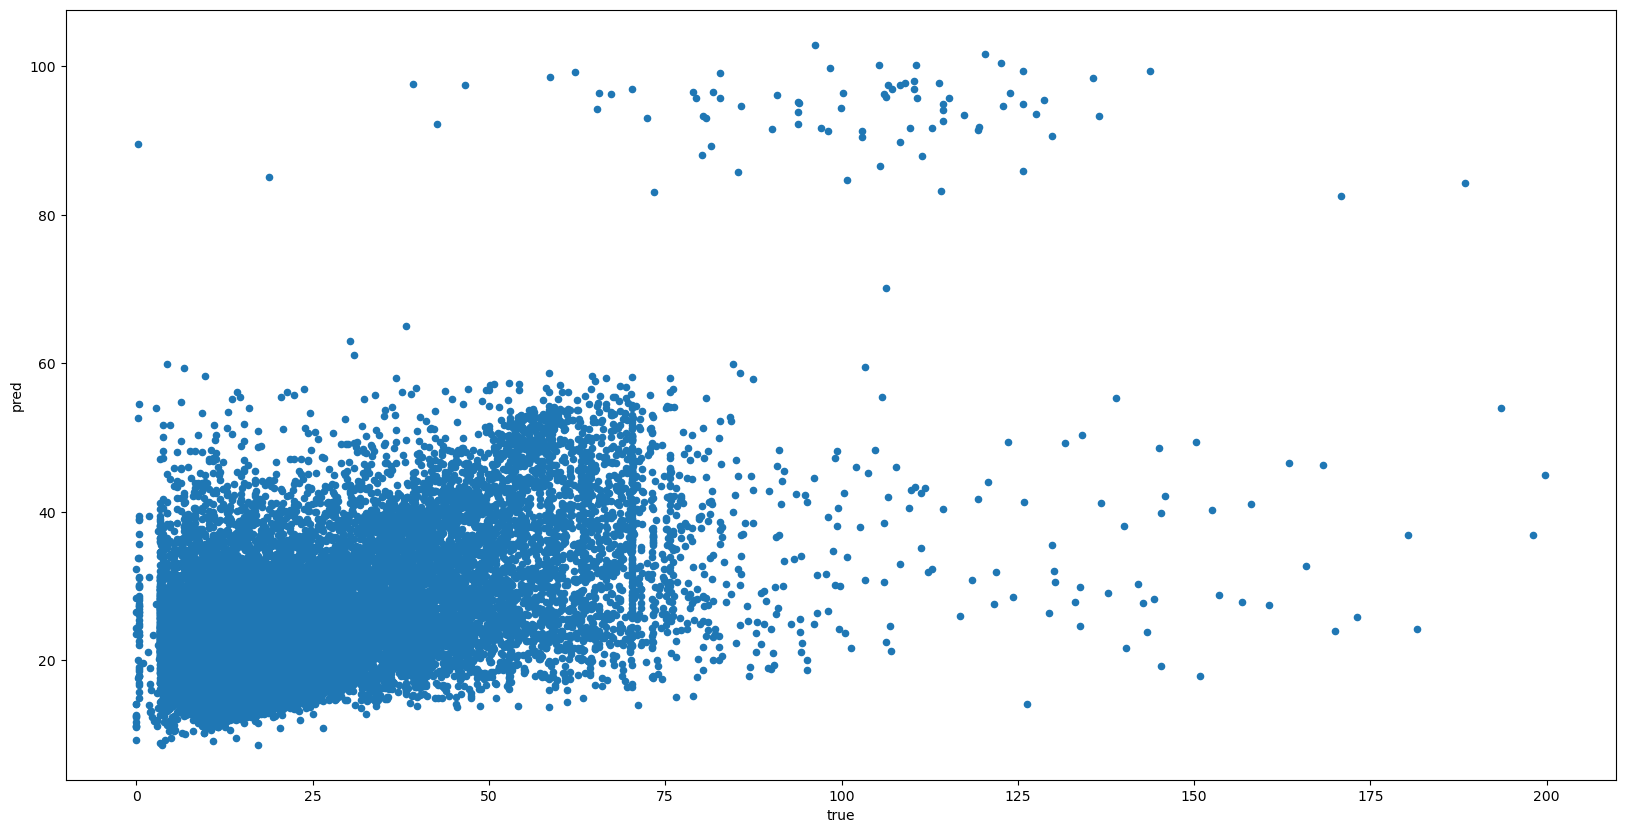

In [85]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Importing pickle library and saving the final model in pkl file

In [86]:
#model_at_hand_revised.save_model('random_model.json')
import pickle
pickle_out = open("random_regressor_final.pkl","wb")
pickle.dump(model_at_hand_revised, pickle_out)
pickle_out.close()